# Growth vs. Yield

Load a few packages.

In [12]:
import pandas
pandas.options.display.max_rows = 12
from cameo import models, phenotypic_phase_plane

Load a model _E. coli_ central carbon metabolism.

In [22]:
model = models.bigg.e_coli_core.copy()

Compute the phenotypic phase plane for growth and acetate secretion.

In [14]:
result = phenotypic_phase_plane(model,
                                variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM],
                                objective=model.reactions.EX_ac_e)

Look at the result in a tabular view.

In [23]:
result.data_frame

BIOMASS_Ecoli_core_w_GAM  objective_lower_bound  objective_upper_bound
0                   0.000000                    0.0           2.000000e+01
1                   0.045996                    0.0           1.930093e+01
2                   0.091992                    0.0           1.860186e+01
3                   0.137988                    0.0           1.790280e+01
4                   0.183983                    0.0           1.720373e+01
5                   0.229979                    0.0           1.650466e+01
..                       ...                    ...                    ...
14                  0.643942                    0.0           9.619970e+00
15                  0.689938                    0.0           7.906992e+00
16                  0.735934                    0.0           6.021404e+00
17                  0.781930                    0.0           4.014269e+00
18                  0.827926                    0.0           2.007135e+00
19                  0.873922                    0.0          -5.664869e-15

[20 rows x 3 columns]

Plot the phenotypic phase plane.

In [24]:
result.plot()

We can also calculate a three dimensional phenotypic phase plane to compare the influence of aerobic and anaerobic environements.

In [25]:
result_3D = phenotypic_phase_plane(model, variables=[model.reactions.EX_ac_e, model.reactions.EX_o2_e], objective=model.reactions.BIOMASS_Ecoli_core_w_GAM, points=50)

In [26]:
result_3D.data_frame

EX_ac_e       EX_o2_e  objective_lower_bound  objective_upper_bound
0         0.0 -6.000000e+01                    0.0          -4.842084e-17
1         0.0 -5.877551e+01                    0.0           2.801293e-02
2         0.0 -5.755102e+01                    0.0           5.602585e-02
3         0.0 -5.632653e+01                    0.0           8.403878e-02
4         0.0 -5.510204e+01                    0.0           1.120517e-01
5         0.0 -5.387755e+01                    0.0           1.400646e-01
...       ...           ...                    ...                    ...
2494     20.0 -6.122449e+00                    0.0           0.000000e+00
2495     20.0 -4.897959e+00                    0.0           0.000000e+00
2496     20.0 -3.673469e+00                    0.0           0.000000e+00
2497     20.0 -2.448980e+00                    0.0           0.000000e+00
2498     20.0 -1.224490e+00                    0.0           0.000000e+00
2499     20.0 -2.160206e-30                    0.0           0.000000e+00

[2500 rows x 4 columns]

Unfortunately, 3D plots are not yet supported out of the box.

In [18]:
result_3D.plot()

So let's quickly write a custom plot (you can use your mouse to rotate the graphic).

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


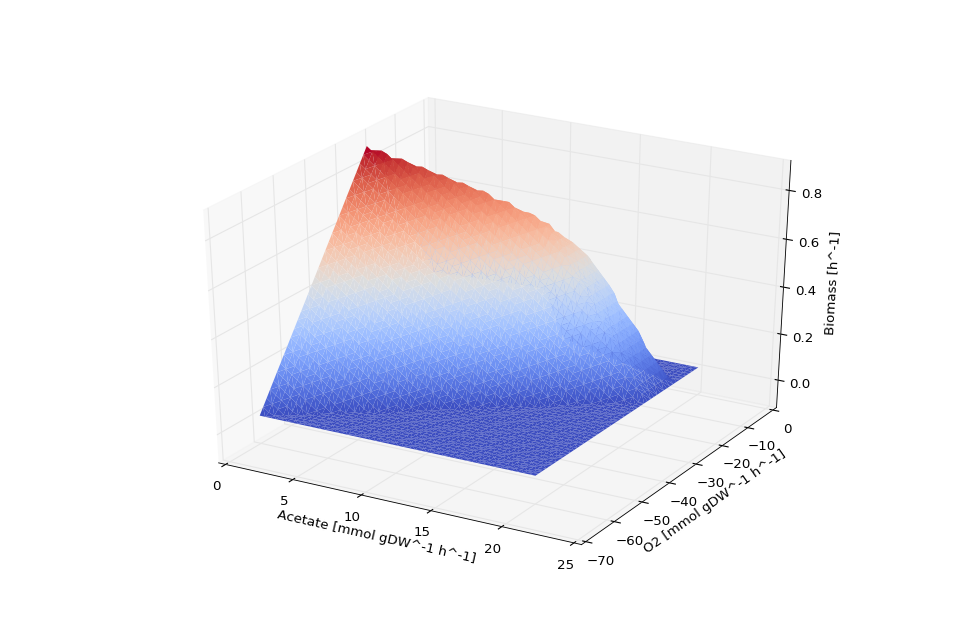

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(
    result_3D.data_frame.EX_ac_e.values,
    result_3D.data_frame.EX_o2_e.values,
    result_3D.data_frame.objective_upper_bound.values,
    cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_xlabel('Acetate [mmol gDW^-1 h^-1]')
ax.set_ylabel('O2 [mmol gDW^-1 h^-1]')
ax.set_zlabel('Biomass [h^-1]')
ax.mouse_init()
# interact(f(fig, ax), angle=(0, 360), elevation=(-100, 100))